# HOUSE PRICE PREDICTION - DATA PIPELINE

# TRAINING

LOAD DATA

In [1]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


PREPROCESS TRAINING DATASET

In [2]:
# Fill common categorical NAs
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType']:
    train_df[col] = train_df[col].fillna('None')

# Fill common numerical NAs
for col in ['GarageYrBlt', 'MasVnrArea']:
    train_df[col] = train_df[col].fillna(0)

# LotFrontage: fill with Neighborhood median
train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Electrical: mode
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])


In [3]:
column_names = train_df.columns.tolist()
column_names

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

FEATURE ENGINEERING

In [4]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['TotalBath'] = (train_df['FullBath'] + 0.5 * train_df['HalfBath'] +
                         train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'])
train_df['TotalPorchSF'] = (train_df['OpenPorchSF'] + train_df['EnclosedPorch'] +
                            train_df['3SsnPorch'] + train_df['ScreenPorch'] + train_df['WoodDeckSF'])
train_df['HasPool'] = train_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasFireplace'] = train_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
train_df['HasGarage'] = train_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train_df['OverallQual_SF'] = train_df['OverallQual'] * train_df['TotalSF']


ENCODING


In [5]:
ordinal_cols = {
    'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'],
    'BsmtCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'],
    'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'],
    'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'],
    'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'],
    'PoolQC': ['Ex', 'Gd', 'TA', 'Fa', 'None']
}

for col, order in ordinal_cols.items():
    train_df[col] = train_df[col].astype(pd.CategoricalDtype(categories=order, ordered=True))
    train_df[col] = train_df[col].cat.codes

# One-hot encode nominal
train_df = pd.get_dummies(train_df, drop_first=True)


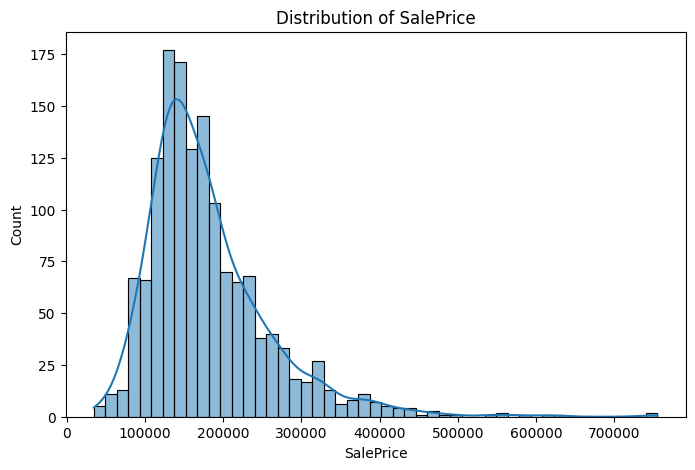

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()


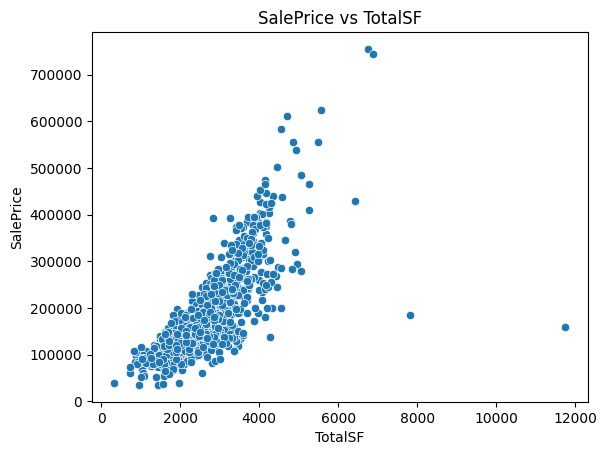

In [7]:
sns.scatterplot(data=train_df, x='TotalSF', y='SalePrice')
plt.title("SalePrice vs TotalSF")
plt.show()


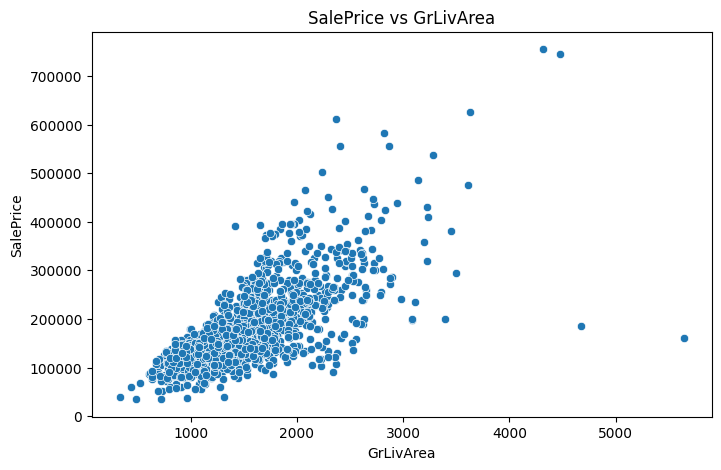

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=train_df, x='GrLivArea', y='SalePrice')
plt.title("SalePrice vs GrLivArea")
plt.show()


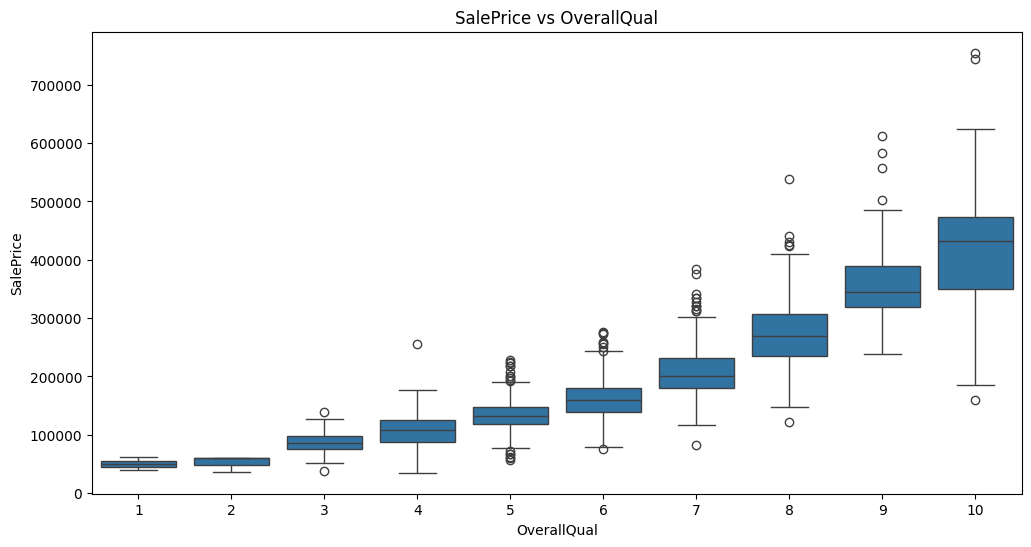

In [9]:
plt.figure(figsize=(12,6))
sns.boxplot(data=train_df, x='OverallQual', y='SalePrice')
plt.title("SalePrice vs OverallQual")
plt.show()


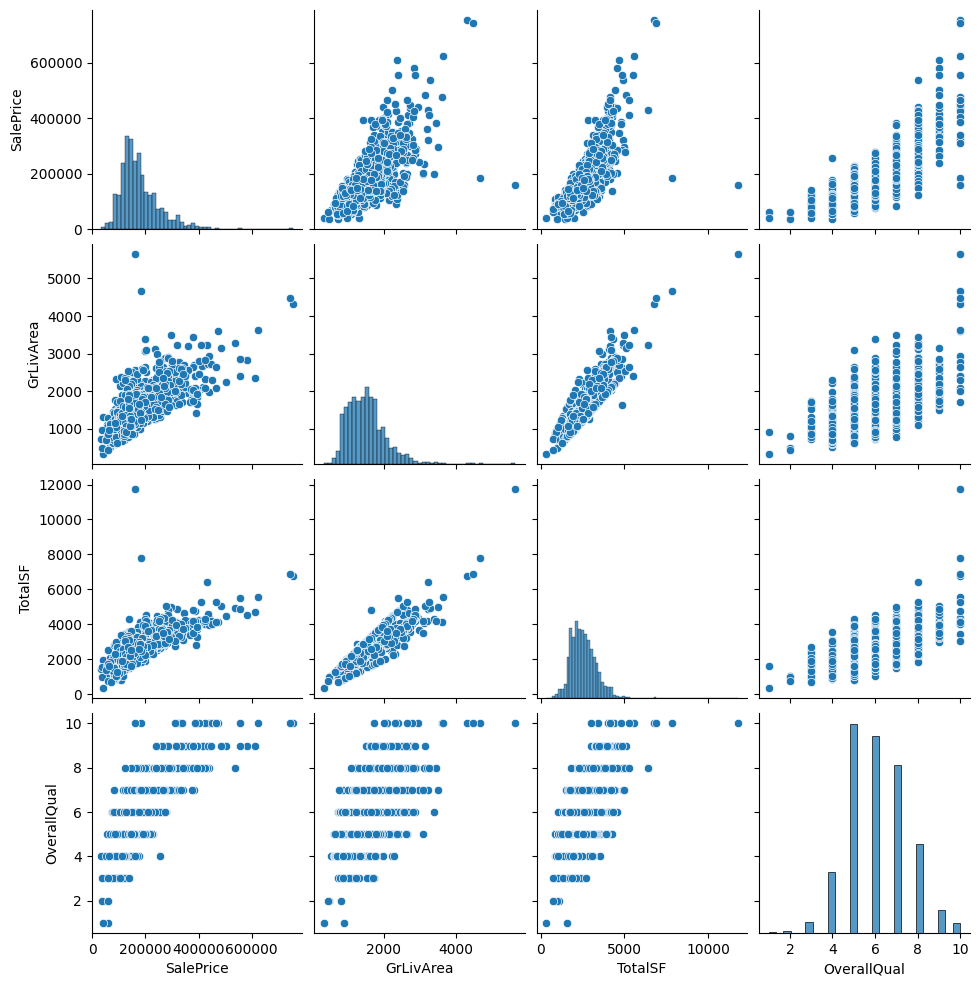

In [10]:
sns.pairplot(train_df, vars=['SalePrice', 'GrLivArea', 'TotalSF', 'OverallQual'])
plt.show()


<Axes: >

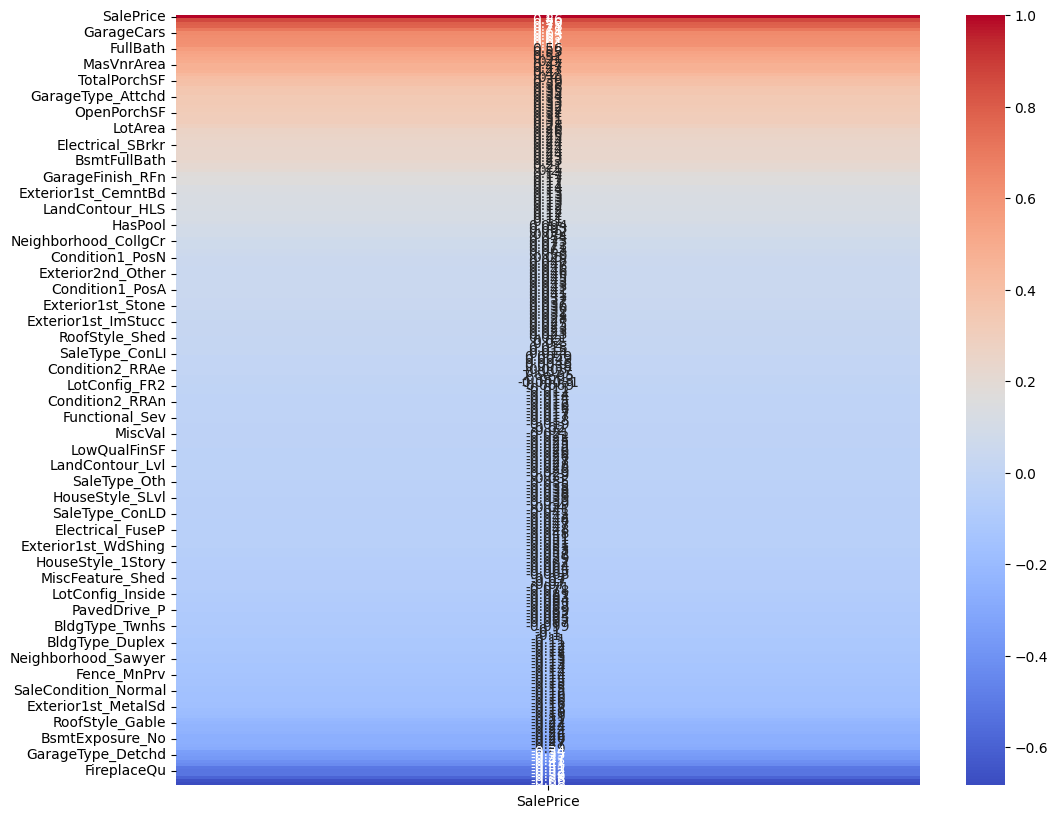

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True, cmap='coolwarm')

In [12]:
# Top 10 correlations with SalePrice
corr_matrix= train_df.corr()
corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr.head(10))

SalePrice         1.000000
OverallQual_SF    0.856148
OverallQual       0.790982
TotalSF           0.782260
GrLivArea         0.708624
GarageCars        0.640409
TotalBath         0.631731
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
Name: SalePrice, dtype: float64


REMOVING WEAK FEATURES

In [13]:
corr = train_df.corr()['SalePrice'].drop('SalePrice')
selected_features = corr[(corr > 0.2) | (corr < -0.2)].index.tolist()
print(f"Strong features: {selected_features}")


Strong features: ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'TotalSF', 'HouseAge', 'RemodAge', 'TotalBath', 'TotalPorchSF', 'HasFireplace', 'HasGarage', 'OverallQual_SF', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_Reg', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock', 'Foundation_PConc', 'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ', 'CentralAir_Y', 'Electrical_SBrkr', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd',

TRAINING THE MODEL

In [18]:
# Top 20 most important features (already transformed feature names, not raw ones!)
top_features = [
    'OverallQual_SF', 'OverallQual', 'TotalSF', 'GrLivArea', 'GarageCars',
    'TotalBath', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
    'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
    'TotalPorchSF', 'Neighborhood_NridgHt', 'Foundation_PConc',
    'BsmtFinType1_GLQ', 'Neighborhood_StoneBr'
]

# 1. Drop target
X = train_df.drop(columns=['SalePrice'])

# 2. One-hot encode
X = pd.get_dummies(X)

# 3. Select only the required columns
X_train_selected = X[top_features]

# 4. Target
y_train = train_df['SalePrice']

# 5. Train model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_selected, y_train)

print("Model trained")


Model trained


In [23]:
import joblib
import pickle

# Save the trained model
joblib.dump(model, 'house_price_model.pkl')

# Save the top 20 feature names
top_20_features = top_features[:20]  # assuming 'top_features' contains more than 20
with open('top_20_features.pkl', 'wb') as f:
    pickle.dump(top_20_features, f)

print("Model and top 20 features saved successfully.")


Model and top 20 features saved successfully.


PREPROCESS / FEATURE ENGINEERING / ENCODING TEST DATASET

In [ ]:
for col in ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType']:
    test_df[col] = test_df[col].fillna('None')

for col in ['GarageYrBlt', 'MasVnrArea']:
    test_df[col] = test_df[col].fillna(0)

test_df['LotFrontage'] = test_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

test_df['Electrical'] = test_df['Electrical'].fillna(test_df['Electrical'].mode()[0])

# Engineer
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df['TotalBath'] = (test_df['FullBath'] + 0.5 * test_df['HalfBath'] +
                        test_df['BsmtFullBath'] + 0.5 * test_df['BsmtHalfBath'])
test_df['TotalPorchSF'] = (test_df['OpenPorchSF'] + test_df['EnclosedPorch'] +
                           test_df['3SsnPorch'] + test_df['ScreenPorch'] + test_df['WoodDeckSF'])
test_df['HasPool'] = test_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
test_df['HasFireplace'] = test_df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
test_df['HasGarage'] = test_df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
test_df['OverallQual_SF'] = test_df['OverallQual'] * test_df['TotalSF']

# Encode
for col, order in ordinal_cols.items():
    test_df[col] = test_df[col].astype(pd.CategoricalDtype(categories=order, ordered=True))
    test_df[col] = test_df[col].cat.codes

test_df = pd.get_dummies(test_df, drop_first=True)


In [ ]:
X_train, X_test = X_train.align(test_df, join='left', axis=1, fill_value=0)


In [ ]:
preds = model.predict(X_test)

submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': preds
})

submission.to_csv('submission.csv', index=False)
print("Submission file ready: submission.csv")


# LIVE HOUSE PRICE PREDICTION

In [ ]:
# Take a sample row
sample_row = X_train.iloc[[0]].copy()

In [ ]:
# Top 21 correlations with SalePrice
corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr.head(20))

In [ ]:
#custom input
sample_row['OverallQual'] = 8
sample_row['TotalSF'] = 6000
sample_row['GrLivArea'] = 3000
sample_row['GarageCars'] = 3
sample_row['TotalBath'] = 5
sample_row['GarageArea'] = 600
sample_row['TotalBsmtSF'] = 3500
sample_row['1stFlrSF'] = 4000
sample_row['FullBath'] = 4
sample_row['TotRmsAbvGrd'] = 9
sample_row['YearBuilt'] = 2005
sample_row['YearRemodAdd'] = 2018
sample_row['MasVnrArea'] = 2000
sample_row['Fireplaces'] = 2
sample_row['TotalPorchSF'] = 576


#neighborhood
neighborhood_cols = [col for col in X_train.columns if col.startswith('Neighborhood_')]
print(neighborhood_cols)
sample_row[neighborhood_cols] = 0
sample_row['Neighborhood_StoneBr'] = 1

# Foundation
foundation_cols = [col for col in X_train.columns if col.startswith('Foundation_')]
print(foundation_cols)
sample_row[foundation_cols] = 0
sample_row['Foundation_PConc'] = 1

# BasementFinishType
bsmt_cols = [col for col in X_train.columns if col.startswith('BsmtFinType1_')]
print(bsmt_cols)
sample_row[bsmt_cols] = 0
sample_row['BsmtFinType1_GLQ'] = 1

In [ ]:
sample_row = sample_row[X_train.columns]

#2D
predicted_price = model.predict(sample_row)[0]

print(f"Predicted SalePrice for your house: ${predicted_price:,.2f}")
